In [2]:
!pip install kaggle
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d uciml/red-wine-quality-cortez-et-al-2009
!unzip red-wine-quality-cortez-et-al-2009

Dataset URL: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009
License(s): DbCL-1.0
red-wine-quality-cortez-et-al-2009.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  red-wine-quality-cortez-et-al-2009.zip
replace winequality-red.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: winequality-red.csv     


In [4]:
import pandas as pd

df = pd.read_csv('/content/winequality-red.csv')

df.head()

df.info()

sample_df = df.sample(frac=0.8, random_state=42)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          

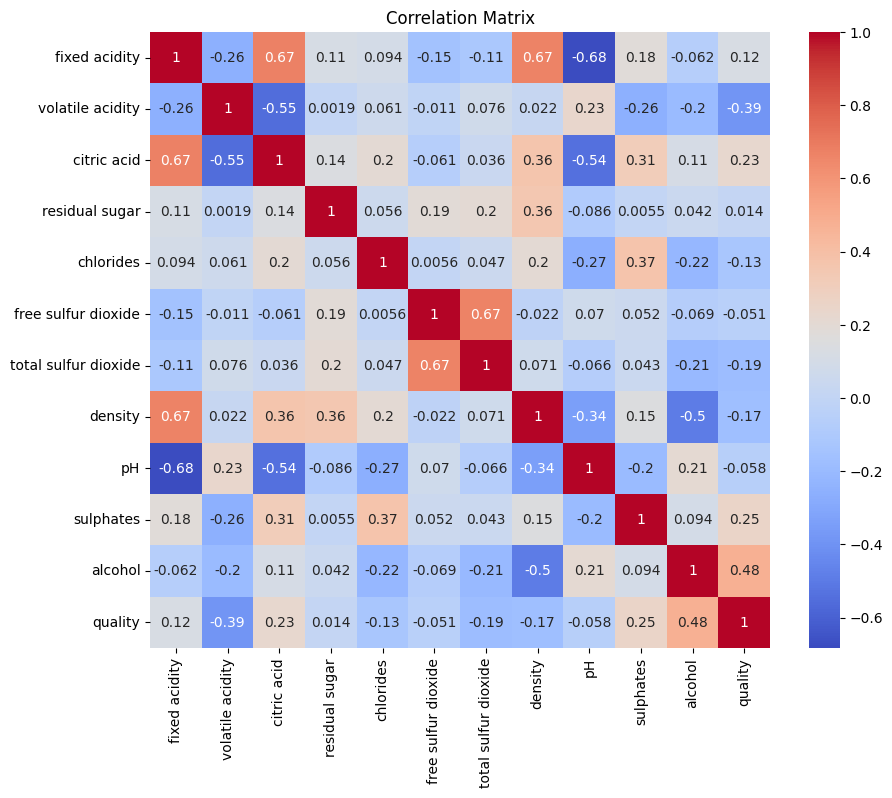

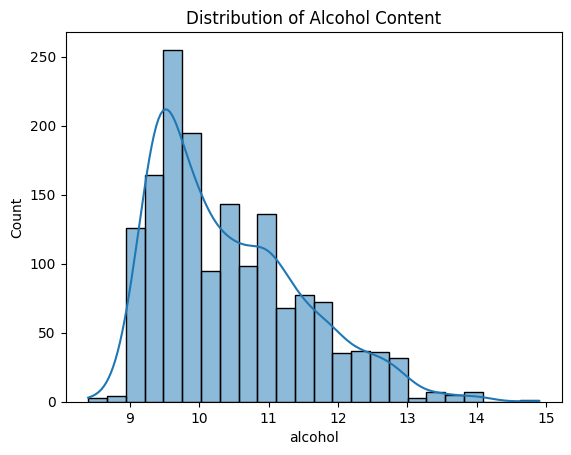

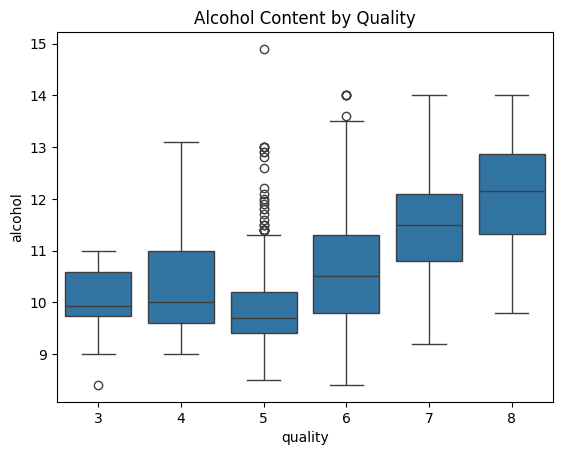

In [5]:
# Step 2: Data Exploration

print(df.isnull().sum())

df.describe()

correlations = df.corr()
print(correlations)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

sns.histplot(df['alcohol'], kde=True)
plt.title('Distribution of Alcohol Content')
plt.show()

sns.boxplot(x='quality', y='alcohol', data=df)
plt.title('Alcohol Content by Quality')
plt.show()


In [6]:
# Step 3: Data Cleaning and Feature Engineering

df = df.dropna()

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('quality', axis=1))

df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_scaled['quality'] = df['quality'].values

df_scaled.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,5
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,5
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,6
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5


In [9]:
# Step 4: Modeling with SMOTE

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, balanced_accuracy_score
from imblearn.over_sampling import SMOTE

X = df_scaled.drop('quality', axis=1)
y = df_scaled['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

logreg = LogisticRegression()
logreg.fit(X_resampled, y_resampled)
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression Accuracy (with SMOTE):", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg, zero_division=1))

dtree = DecisionTreeClassifier()
dtree.fit(X_resampled, y_resampled)
y_pred_dtree = dtree.predict(X_test)
print("Decision Tree Accuracy (with SMOTE):", accuracy_score(y_test, y_pred_dtree))
print(classification_report(y_test, y_pred_dtree, zero_division=1))

rf = RandomForestClassifier()
rf.fit(X_resampled, y_resampled)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy (with SMOTE):", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, zero_division=1))

balanced_acc_rf = balanced_accuracy_score(y_test, y_pred_rf)
print(f"Balanced Accuracy for Random Forest: {balanced_acc_rf}")


Logistic Regression Accuracy (with SMOTE): 0.396875
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.08      0.50      0.14        10
           5       0.63      0.45      0.53       130
           6       0.59      0.29      0.39       132
           7       0.43      0.52      0.47        42
           8       0.09      0.60      0.15         5

    accuracy                           0.40       320
   macro avg       0.30      0.39      0.28       320
weighted avg       0.56      0.40      0.44       320

Decision Tree Accuracy (with SMOTE): 0.496875
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.64      0.57      0.60       130
           6       0.52      0.45      0.49       132
           7       0.51      0.57      0.54        42
           8       0.11      0.20 

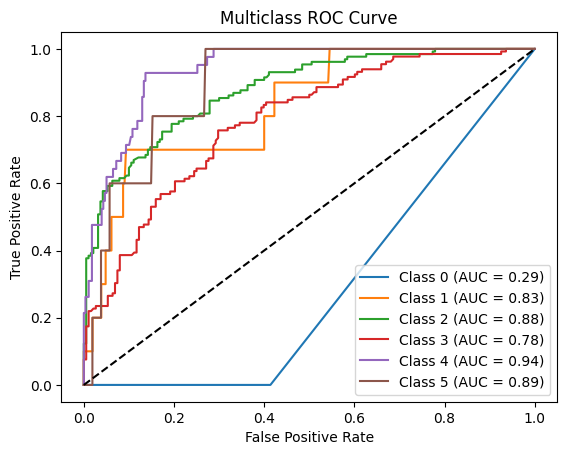

Macro-Averaged AUC: 0.7688256862883738


In [12]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

y_test_binarized = label_binarize(y_test, classes=[3, 4, 5, 6, 7, 8])  # Adjust based on unique quality scores in your dataset
n_classes = y_test_binarized.shape[1]

ovr_rf = OneVsRestClassifier(RandomForestClassifier())
y_prob_rf = ovr_rf.fit(X_resampled, y_resampled).predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob_rf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.show()

macro_roc_auc = roc_auc_score(y_test_binarized, y_prob_rf, average='macro')
print(f'Macro-Averaged AUC: {macro_roc_auc}')
